In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### FFT and Windowing analysis

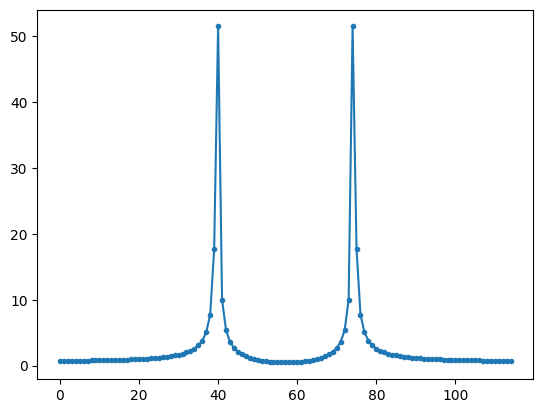

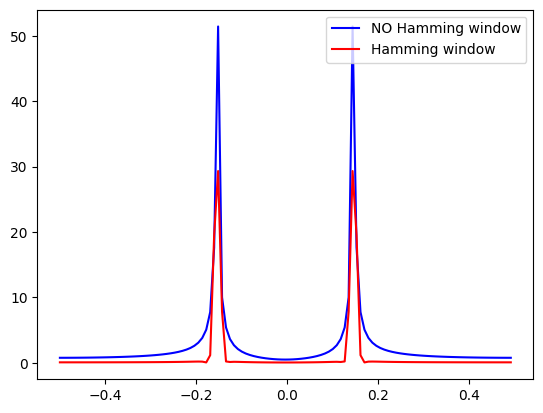

In [15]:
Fs = 1 # Hz
N = 115 # number of points to simulate, and our FFT size

t = np.arange(N)
s = np.sin(0.15*2*np.pi*t)
S = (np.fft.fft(s))
S_shifted = np.fft.fftshift(S)

S_mag = np.abs(S_shifted)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)

s = s * np.hamming(N)
S_hammed = np.fft.fftshift(np.fft.fft(s))

plt.figure(0)
plt.plot(S_mag,'.-') # here the x-axis are just indexes
plt.figure(1)
plt.plot(f,S_mag,'blue',label="NO Hamming window") # Only now we are getting the information about the signal frequencies
plt.plot(f,np.abs(S_hammed),'red',label="Hamming window")
plt.legend()
plt.show()


### Waterfall/ Spectrogram

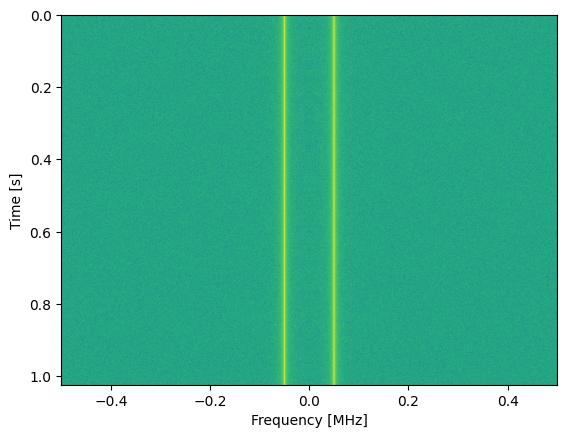

In [16]:
sample_rate = 1e6
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))
fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, len(x)/sample_rate, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

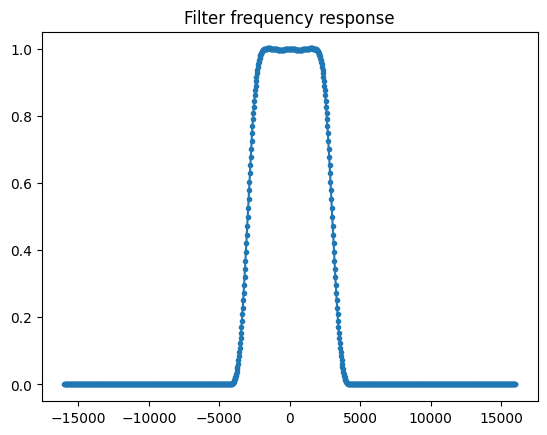

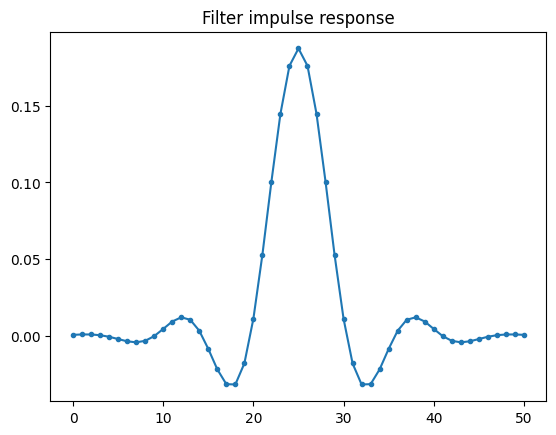

In [3]:
num_taps = 51 # it helps to use an odd number of taps
cut_off = 3000 # Hz
sample_rate = 32000 # Hz

# create our low pass filter
h = signal.firwin(num_taps, cut_off, fs=sample_rate)


# Frequency response computation
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis

plt.plot(w, H, '.-')
plt.title("Filter frequency response")
plt.show()

# plot the impulse response
plt.plot(h, '.-')
plt.title("Filter impulse response")
plt.show()